# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [7]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9732142857142857
평가 데이터 점수: 1.0


In [9]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [10]:
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9553571428571429
평가 데이터 점수: 0.9473684210526315


In [11]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    2.5s finished


{'fit_time': array([0.0009973 , 0.00099635, 0.0009973 , 0.        , 0.00099659]),
 'score_time': array([0.00299144, 0.00299168, 0.00299168, 0.00299239, 0.00199556]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [12]:
param_grid = [{'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [13]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [14]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [15]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [16]:
print('GridaSearchCV best score: {}',format(gs.best_score_))

GridaSearchCV best score: {} 0.9800000000000001


In [17]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [18]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [19]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,10.563006,21.432007,0
1,11.315686,18.892929,0
2,10.304287,18.899757,0
3,10.624669,18.493448,0
4,10.857654,21.483980,0
...,...,...,...
145,-5.145190,-14.683843,2
146,-5.203867,-11.471189,2
147,-5.029723,-13.770472,2
148,-5.972358,-15.141632,2


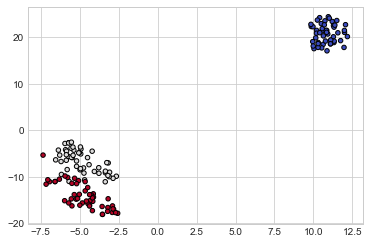

In [20]:
plt.scatter(X_comp[:, 0], X_comp[:, 1],
           c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

In [21]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

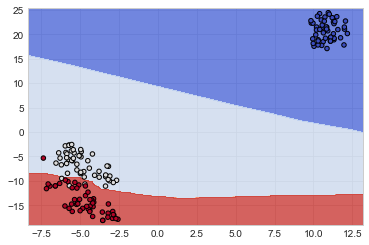

In [22]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 유방암 데이터

In [23]:
cancer = load_breast_cancer()

In [24]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [25]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
cancer_train_df = pd.DataFrame(data=X_train, columns=cancer.feature_names)
cancer_train_df['target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,0.06323,...,28.45,123.50,981.2,0.14150,0.4667,0.58620,0.20350,0.3054,0.09519,0
1,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.06113,...,15.97,83.74,510.5,0.15480,0.2390,0.21020,0.08958,0.3016,0.08523,1
2,12.22,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,0.06894,...,24.17,85.13,515.3,0.14020,0.2315,0.35350,0.08088,0.2709,0.08839,1
3,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,...,32.72,141.30,1298.0,0.13920,0.2817,0.24320,0.18410,0.2311,0.09203,0
4,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,25.80,195.00,2227.0,0.12940,0.3885,0.47560,0.24320,0.2741,0.08574,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,22.46,97.19,725.9,0.09711,0.1824,0.15640,0.06019,0.2350,0.07014,1
451,13.46,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.03152,0.1723,0.06317,...,25.16,101.90,719.8,0.16240,0.3124,0.26540,0.14270,0.3518,0.08665,1
452,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.15460,0.2394,0.37910,0.15140,0.2837,0.08019,0
453,11.60,24.49,74.23,417.2,0.07474,0.05688,0.01974,0.01313,0.1935,0.05878,...,31.62,81.39,476.5,0.09545,0.1361,0.07239,0.04815,0.3244,0.06745,1


In [27]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [28]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9494505494505494
평가 데이터 점수: 0.9035087719298246


In [30]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [31]:
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9692307692307692
평가 데이터 점수: 0.9824561403508771


In [32]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [33]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099754, 0.00199437, 0.00099683, 0.00099707, 0.00199413]),
 'score_time': array([0.00498605, 0.00498676, 0.00398922, 0.00498581, 0.00498581]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [34]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())]
)

In [35]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
              'model__weights' : ['uniform', 'distance'],
              'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [36]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [37]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=6,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [38]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [39]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


In [40]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [41]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,-25.934929,10.270978,0
1,-28.003477,8.341705,0
2,-26.517471,3.588157,0
3,21.488720,7.796037,0
4,-24.174938,2.933642,0
...,...,...,...
564,-29.505016,9.251525,0
565,-26.203913,4.681952,0
566,-16.438751,-11.813568,0
567,-27.294409,6.224569,0


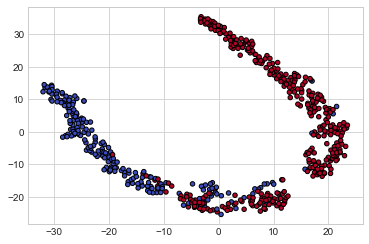

In [42]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [43]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

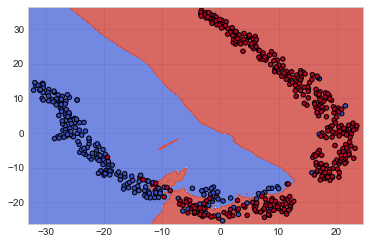

In [44]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# 와인데이터

In [45]:
wine = load_breast_cancer()

In [46]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = cancer.target
wine_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [47]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
wine_train_df = pd.DataFrame(data=X_train, columns=wine.feature_names)
wine_train_df['target'] = y_train
wine_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399,1
1,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.066370,0.1428,0.05313,...,45.41,180.20,2477.0,0.1408,0.40970,0.39950,0.16250,0.2713,0.07568,0
2,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.029440,0.1714,0.05898,...,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234,1
3,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.095610,0.1765,0.05024,...,27.84,158.30,1656.0,0.1178,0.29200,0.38610,0.19200,0.2909,0.05865,0
4,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.030780,0.1705,0.05913,...,19.35,93.22,605.8,0.1326,0.26100,0.34760,0.09783,0.3006,0.07802,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,14.97,19.76,95.50,690.2,0.08421,0.05352,0.01947,0.019390,0.1515,0.05266,...,25.82,102.30,782.1,0.1045,0.09995,0.07750,0.05754,0.2646,0.06085,1
451,13.30,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.024240,0.1815,0.05696,...,29.20,92.94,621.2,0.1140,0.16670,0.12120,0.05614,0.2637,0.06658,1
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.019450,0.1615,0.06104,...,37.88,85.07,523.7,0.1208,0.18560,0.18110,0.07116,0.2447,0.08194,1
453,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.022570,0.2030,0.06552,...,28.26,77.80,436.6,0.1087,0.17820,0.15640,0.06413,0.3169,0.08032,1


In [49]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [50]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.6329670329670329
평가 데이터 점수: 0.6052631578947368


In [52]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [53]:
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9736263736263736
평가 데이터 점수: 0.9824561403508771


In [54]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [55]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099778, 0.00199533, 0.00199461, 0.00099683, 0.00099587]),
 'score_time': array([0.00498581, 0.00498605, 0.0039897 , 0.00498629, 0.0039897 ]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [56]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())]
)

In [57]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
              'model__weights' : ['uniform', 'distance'],
              'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [58]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [59]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=6,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [60]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [61]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


In [62]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [63]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,-19.823605,-23.418911,0
1,-22.663342,-23.211761,0
2,-24.156937,-18.406303,0
3,15.486367,3.346588,0
4,-22.510925,-16.692465,0
...,...,...,...
564,-23.345554,-24.807335,0
565,-23.276718,-19.214207,0
566,-23.698000,0.857756,0
567,-22.606468,-20.953438,0


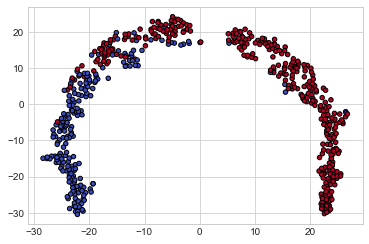

In [64]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [65]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

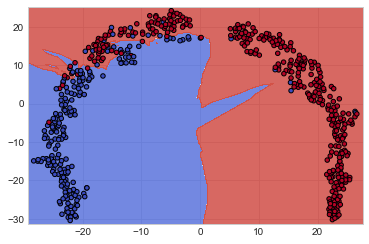

In [67]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [68]:
boston = load_boston()

In [70]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [73]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
boston_train_df = pd.DataFrame(data=X_train, columns=boston.feature_names)
boston_train_df['TARGET'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,5.82401,0.0,18.10,0.0,0.532,6.242,64.7,3.4242,24.0,666.0,20.2,396.90,10.74,23.0
1,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29,28.0
2,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42,21.8
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
4,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,10.06230,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69,14.1
400,0.13117,0.0,8.56,0.0,0.520,6.127,85.2,2.1224,5.0,384.0,20.9,387.69,14.09,20.4
401,7.67202,0.0,18.10,0.0,0.693,5.747,98.9,1.6334,24.0,666.0,20.2,393.10,19.92,8.5
402,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


In [83]:
boston_test_df = pd.DataFrame(data=X_test, columns=boston.feature_names)
boston_test_df['TARGET'] = y_test
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.05515,33.0,2.18,0.0,0.472,7.236,41.1,4.0220,7.0,222.0,18.4,393.68,6.93,36.1
1,0.22969,0.0,10.59,0.0,0.489,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97,24.4
2,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02,13.6
3,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15,23.0
4,0.08707,0.0,12.83,0.0,0.437,6.140,45.8,4.0905,5.0,398.0,18.7,386.96,10.27,20.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57,20.6
98,0.06642,0.0,4.05,0.0,0.510,6.860,74.4,2.9153,5.0,296.0,16.6,391.27,6.92,29.9
99,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78,27.5
100,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58,18.8


In [84]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [85]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [87]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7053640530967427
평가 데이터 점수: 0.5084132150221872


In [88]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [90]:
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.8258880429646408
평가 데이터 점수: 0.7831578911906628


In [91]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [92]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    2.4s finished


{'fit_time': array([0.00099707, 0.00099707, 0.00199533, 0.00099826, 0.00199413]),
 'score_time': array([0.00199604, 0.00199509, 0.00099683, 0.00199342, 0.00099778]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [93]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())]
)

In [94]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
              'model__weights' : ['uniform', 'distance'],
              'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [95]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [96]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=6,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [97]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [98]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.4973060611762845


In [110]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [111]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target'] = y
boston_comp_df

,0,target
0,-24.258308,24.0
1,-41.036221,21.6
2,-41.809700,34.7
3,-43.255428,33.4
4,-43.411320,36.2
...,...,...
501,-26.985271,22.4
502,-27.671801,20.6
503,-28.490084,23.9
504,-28.442066,22.0


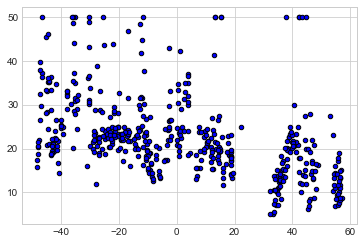

In [114]:
plt.scatter(X_comp[:, 0], y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [115]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

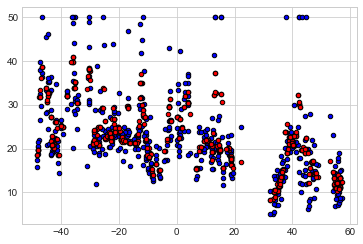

In [116]:
plt.scatter(X_comp[:, 0], y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp[:, 0], predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 캘리포니아 주택 가격 데이터

In [117]:
california = fetch_california_housing()

In [118]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['TARGET'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [119]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
california_train_df = pd.DataFrame(data=X_train, columns=california.feature_names)
california_train_df['TARGET'] = y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,2.1281,33.0,3.834218,1.051724,1607.0,2.131300,32.63,-117.08,1.39800
1,7.5426,15.0,7.002972,0.997028,2197.0,3.264487,33.65,-117.65,2.94800
2,4.3523,5.0,6.425532,1.021277,376.0,2.666667,39.25,-121.20,1.88200
3,3.9688,15.0,16.550562,3.078652,622.0,2.329588,34.24,-116.87,1.82800
4,3.4472,45.0,4.468630,0.911652,2337.0,2.992318,37.73,-122.40,2.25400
...,...,...,...,...,...,...,...,...,...
16507,2.6923,49.0,3.809302,1.060465,1500.0,3.488372,34.09,-118.23,1.50000
16508,3.4340,17.0,5.352941,1.048559,6990.0,2.759574,32.78,-116.94,1.93200
16509,3.9837,31.0,5.018651,1.044476,2098.0,3.010043,33.87,-118.09,2.46000
16510,4.2414,49.0,4.857143,0.984375,1040.0,2.321429,37.78,-122.49,5.00001


In [122]:
california_train_df = pd.DataFrame(data=X_test, columns=california.feature_names)
california_train_df['TARGET'] = y_test
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,3.1406,40.0,4.341146,0.950521,1161.0,3.023438,34.05,-118.31,4.17600
1,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,2.83500
2,5.6945,36.0,6.191489,1.021277,124.0,2.638298,37.59,-120.59,1.54200
3,3.3958,25.0,6.069801,1.272080,2319.0,3.303419,34.11,-117.42,1.11900
4,4.7159,9.0,6.402299,0.988506,529.0,3.040230,37.68,-120.97,1.63700
...,...,...,...,...,...,...,...,...,...
4123,4.3370,37.0,4.035320,1.015453,1075.0,2.373068,33.99,-118.46,3.60600
4124,2.1542,27.0,3.182143,1.000000,1785.0,3.187500,32.66,-117.10,1.06300
4125,4.8750,5.0,5.731518,0.887160,842.0,3.276265,34.08,-117.17,1.38100
4126,7.6520,36.0,6.392573,0.957560,934.0,2.477454,37.43,-122.24,5.00001


In [123]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [124]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [125]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.450719719861968
평가 데이터 점수: 0.15574050977851506


In [126]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [127]:
print('학습 데이터 점수: {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.7922397721789367
평가 데이터 점수: 0.6918243503148787


In [128]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [129]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    2.8s finished


{'fit_time': array([0.04089093, 0.03989244, 0.03889489, 0.03989148, 0.036901  ]),
 'score_time': array([0.33745313, 0.2766161 , 0.28646994, 0.36129618, 0.33439088]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [130]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())]
)

In [131]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
              'model__weights' : ['uniform', 'distance'],
              'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [132]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [133]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=6,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [134]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [135]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.5376515274379832


In [136]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [137]:
california_comp_df = pd.DataFrame(data=X_comp)
california_comp_df['target'] = y
california_comp_df

,0,target
0,-24.290348,4.526
1,51.094921,3.585
2,-64.146614,3.521
3,-58.370148,3.413
4,-57.831821,3.422
...,...,...
20635,28.481985,0.781
20636,-25.714781,0.771
20637,76.900314,0.923
20638,-0.444366,0.847


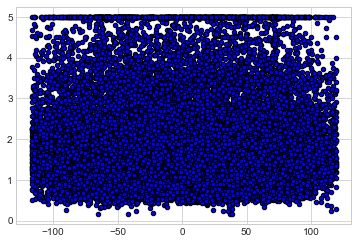

In [138]:
plt.scatter(X_comp[:, 0], y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [139]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

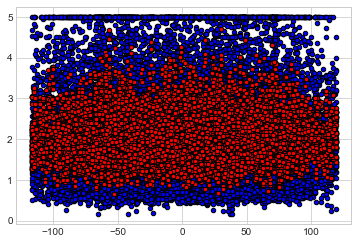

In [140]:
plt.scatter(X_comp[:, 0], y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp[:, 0], predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')